**Business Need for Fraud Detection in Financial Transactions**

Problem Statement

Financial institutions, e-commerce platforms, and online payment systems face significant losses due to fraudulent transactions. Fraudsters use stolen credit card details, fake identities, and other malicious tactics to perform unauthorized transactions.

Why is Fraud Detection Important?

Financial Loss Prevention: Banks and businesses lose billions annually due to fraud.

Customer Trust & Retention: Ensuring transaction security enhances customer confidence.

Regulatory Compliance: Companies must comply with financial regulations to prevent fraud.

Operational Efficiency: Detecting fraud early saves investigation costs and reduces chargebacks.

Business Impact

Reduced Chargebacks & Losses 🏦

Early fraud detection minimizes financial losses.

Enhanced Security & Compliance 🔐

Detecting anomalies ensures compliance with anti-fraud regulations.

Improved Customer Experience 💳

Preventing fraud protects customer accounts and builds trust.

Objective of the Project

Analyze transaction data to identify patterns of fraudulent behavior.

Develop a Machine Learning model to detect fraud in real-time.

Improve accuracy using feature engineering and various ML algorithms.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV

In [9]:
# Load dataset
data = pd.read_csv("fraud_detection_sample.csv")
data.head()


,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,15795,4292.21,0.593101,-1.592994,0.126380,0.189706,0.333860,-1.535040,0.872197,-2.386930,-0.190872,-1.846573,0
1,860,2145.54,-0.309546,0.440475,1.938929,-0.661982,1.431367,-1.880010,-0.315087,-0.495878,-0.198196,-0.428655,0
2,76820,3754.60,0.326133,-0.019638,-1.000331,0.425887,1.081767,0.712712,-0.571746,1.097300,0.510157,1.029441,0
3,54886,3772.96,-1.251114,0.552490,-0.677745,0.019148,-1.312219,-1.883150,0.332608,-1.565648,1.272570,-0.336895,0
4,6265,516.52,0.924027,0.223914,0.513908,-0.641487,0.622070,-0.372319,0.933128,-3.007632,0.126314,-0.846434,0


## EDA: Check class distribution

In [10]:
# Display basic info
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nClass distribution:")
print(data['Class'].value_counts(normalize=True))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    500 non-null    int64  
 1   Amount  500 non-null    float64
 2   V1      500 non-null    float64
 3   V2      500 non-null    float64
 4   V3      500 non-null    float64
 5   V4      500 non-null    float64
 6   V5      500 non-null    float64
 7   V6      500 non-null    float64
 8   V7      500 non-null    float64
 9   V8      500 non-null    float64
 10  V9      500 non-null    float64
 11  V10     500 non-null    float64
 12  Class   500 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 50.9 KB
None

First 5 rows:
    Time   Amount        V1        V2        V3        V4        V5        V6  \
0  15795  4292.21  0.593101 -1.592994  0.126380  0.189706  0.333860 -1.535040   
1    860  2145.54 -0.309546  0.440475  1.938929 -0.661982  1.431367 -1.880010   
2  76820  3

In [11]:
# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Verify new class distribution
print("Resampled class distribution:", np.bincount(y_res))

Resampled class distribution: [336 336]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       144
           1       0.00      0.00      0.00         6

    accuracy                           0.93       150
   macro avg       0.48      0.49      0.48       150
weighted avg       0.92      0.93      0.93       150


Confusion Matrix:
[[140   4]
 [  6   0]]

ROC AUC Score: 0.513888888888889


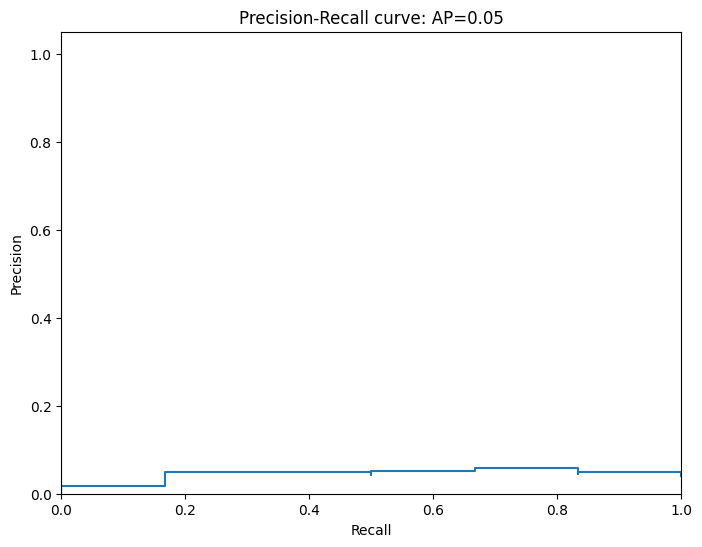

In [12]:
# Model training with Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)

# Predictions
y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [13]:
# Create pipeline with SMOTE and Random Forest
pipeline = imbpipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                          scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)
y_pred_proba_optimized = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

print("\nOptimized ROC AUC Score:",
      roc_auc_score(y_test, y_pred_proba_optimized))

Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       144
           1       0.00      0.00      0.00         6

    accuracy                           0.89       150
   macro avg       0.48      0.46      0.47       150
weighted avg       0.92      0.89      0.90       150


Optimized ROC AUC Score: 0.40162037037037035


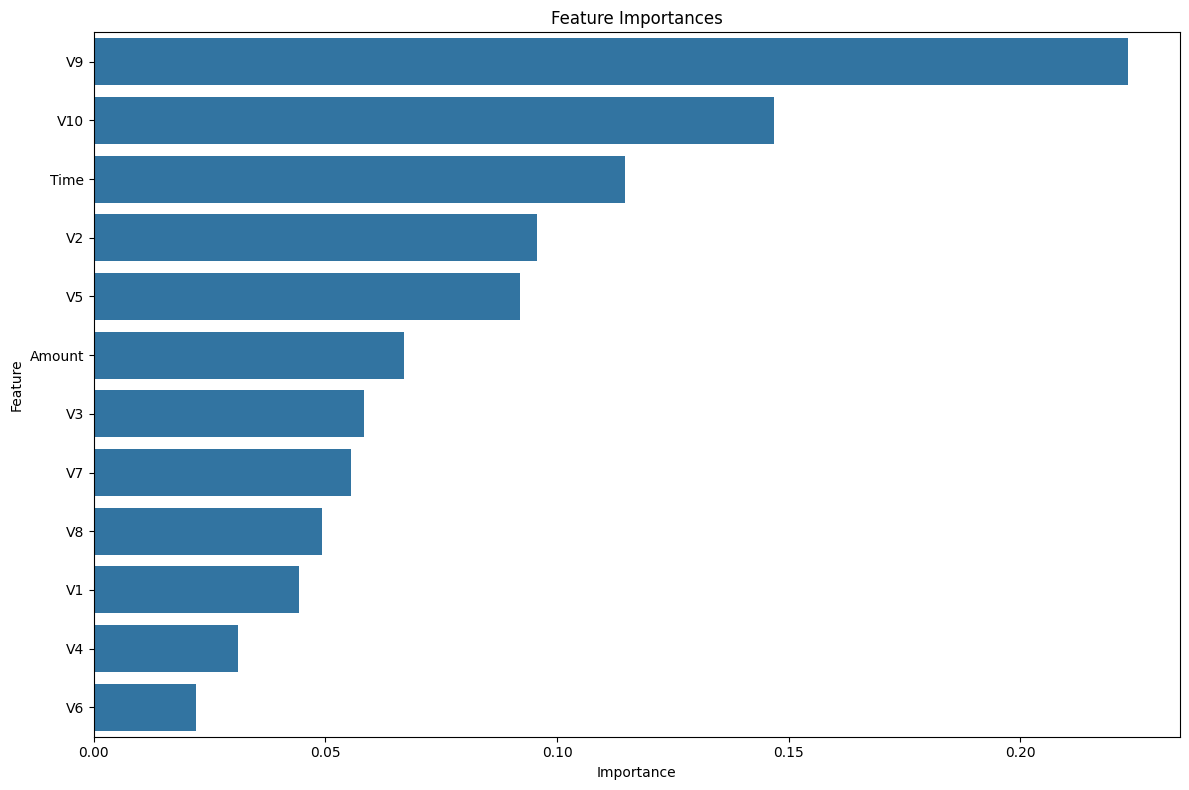

In [14]:
# Get feature importances from the best model
feature_importances = best_model.named_steps['rf'].feature_importances_

# Create DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import f1_score

# Try different thresholds
thresholds = np.linspace(0.1, 0.9, 9)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_optimized >= threshold).astype(int)
    current_f1 = f1_score(y_test, y_pred_thresh)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {best_f1:.4f}")

# Apply best threshold
y_pred_final = (y_pred_proba_optimized >= best_threshold).astype(int)

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

Best threshold: 0.10
Best F1 score: 0.0769

Final Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.52      0.68       144
           1       0.04      0.50      0.08         6

    accuracy                           0.52       150
   macro avg       0.50      0.51      0.38       150
weighted avg       0.92      0.52      0.65       150



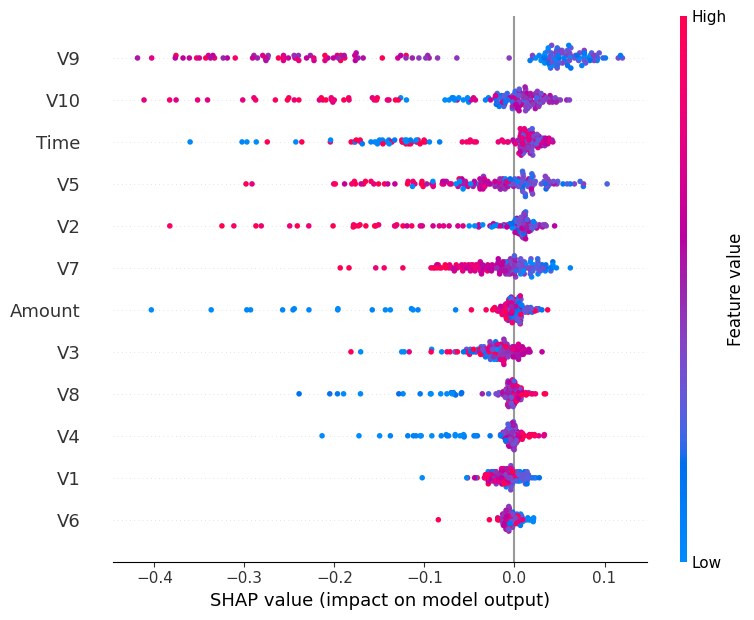

In [30]:
import shap

# Create SHAP explainer
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
plt.figure(figsize=(10, 8))
# Use shap_values[:, :, 1] for plotting SHAP values for class 1
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=X.columns)
plt.show()

In [31]:
import joblib

# Save the best model and scaler
joblib.dump(best_model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

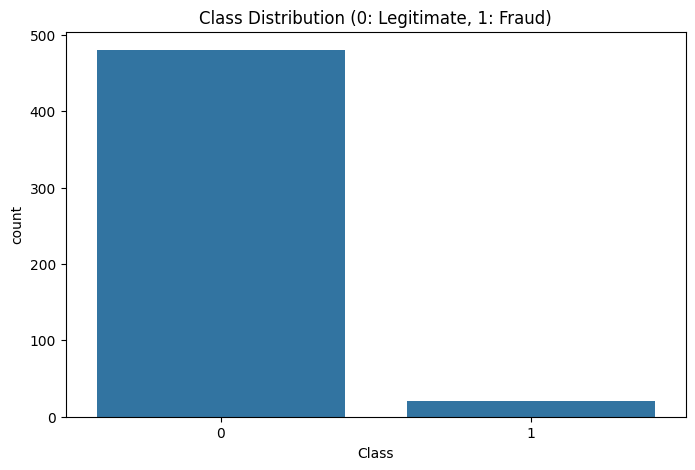

In [32]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()


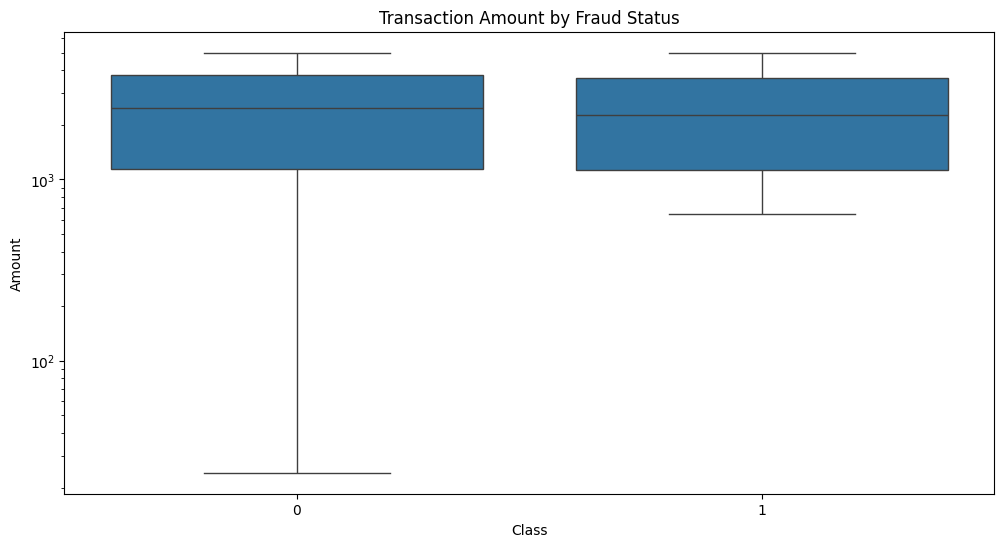

In [33]:
# Transaction amount analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log')  # Using log scale due to wide range of amounts
plt.title('Transaction Amount by Fraud Status')
plt.show()


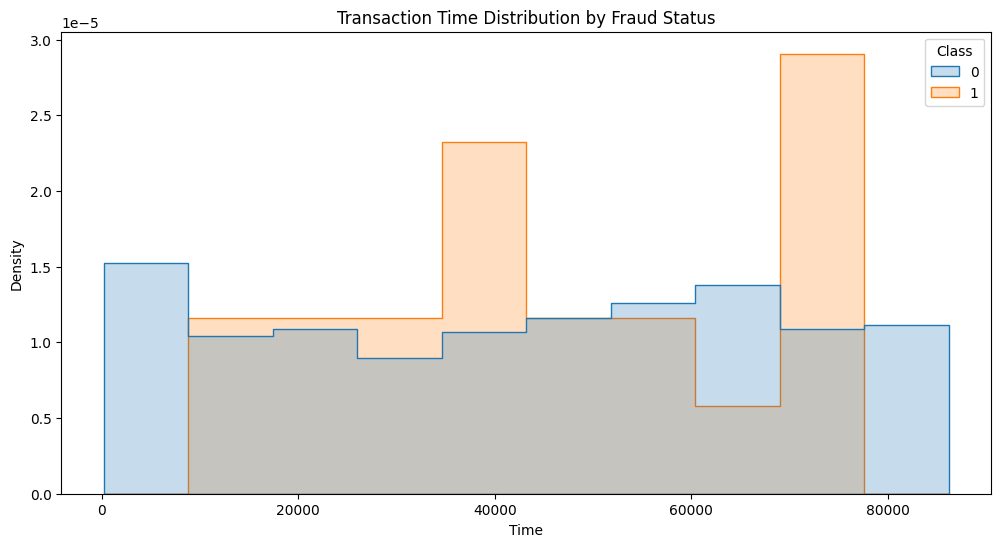

In [34]:
# Time analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Time', hue='Class', element='step', stat='density', common_norm=False)
plt.title('Transaction Time Distribution by Fraud Status')
plt.show()

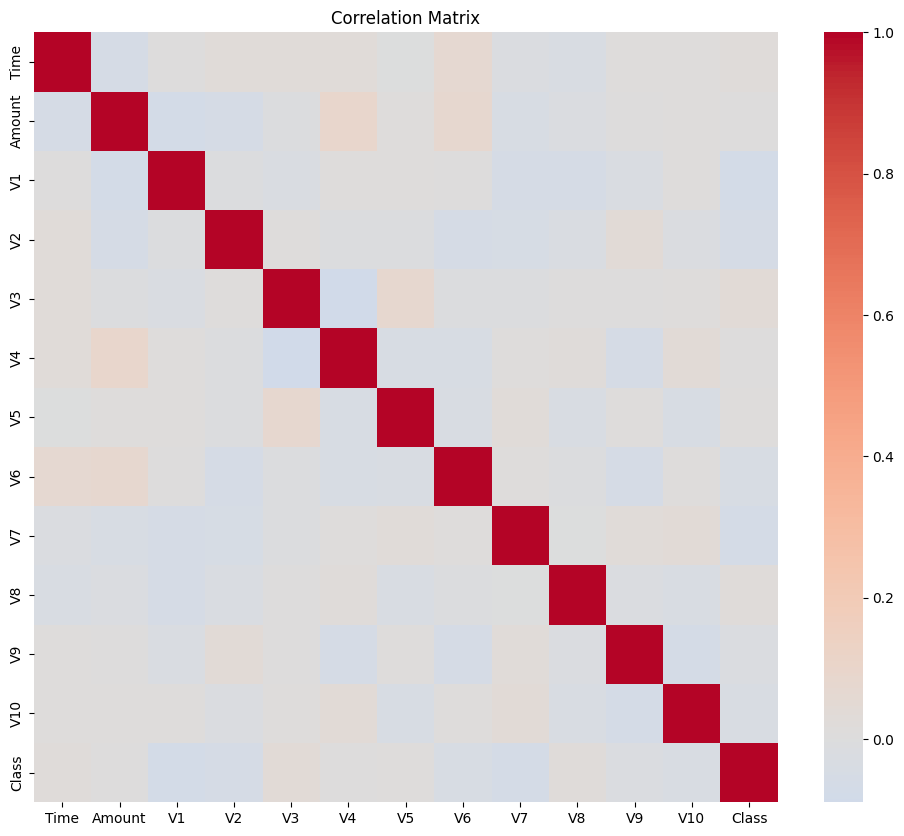

In [35]:
# Correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

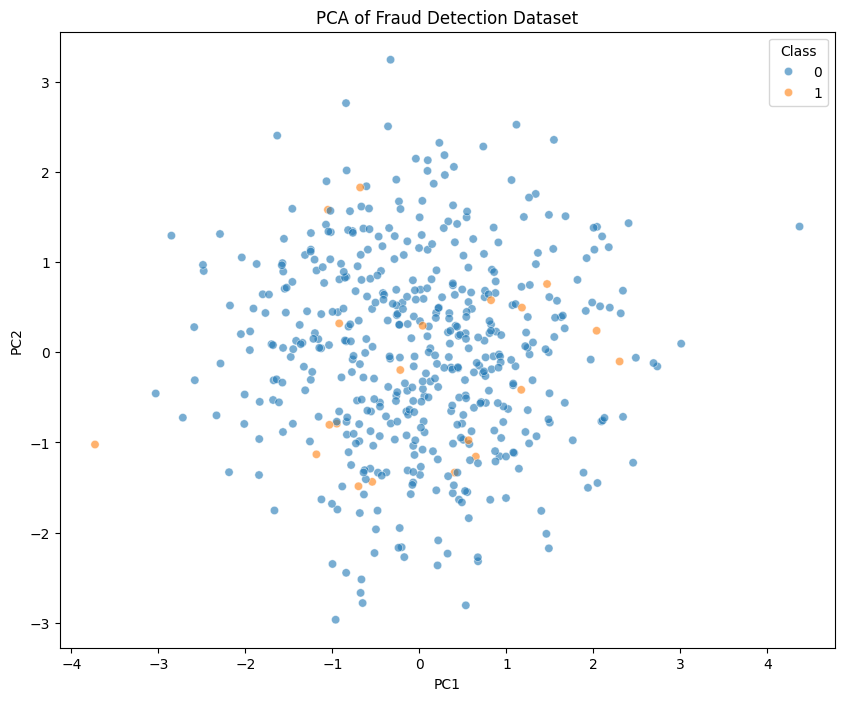

In [36]:
# PCA visualization (optional)
from sklearn.decomposition import PCA

X_temp = data.drop('Class', axis=1)
y_temp = data['Class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_temp)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = y_temp.values

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, alpha=0.6)
plt.title('PCA of Fraud Detection Dataset')
plt.show()